# Experiment walk-through


To replicate the results from scratch, please carry out the steps under 'replication'. 

To inspect the results, please carry out the steps under 'analysis'. 


* Property dataset: ../data/aggregated/vocab

* Female dataset (full): ../data/gender/control


## Replication

### 1. Data and models

* Download distributional models:
    * Googlenews
    * Gigaword
    * Wiki (will be made available)
    


### 2. Create ceiling dataset splits


Run:
    
`python create_ceiling_splits.py`

### 3. Create data splits



Run:

`python create_data_splits.py [google model path] [test (True/False]]`

For example to test (only uses property **yellow**):

`python create_data_splits.py ../../../../Data/dsm/word2vec/GoogleNews-vectors-negative300.bin True`

For example to run on the full dataset:

`python create_data_splits.py ../../../../Data/dsm/word2vec/GoogleNews-vectors-negative300.bin False`

### Inspect property set sizes:

In [3]:
from utils_control import get_props, get_data_dist_size


import pandas as pd



model_names = {'giga_corpus', 'wiki_corpus', 'googlenews'}
props = get_props()
p_dicts = get_data_dist_size(props, model_names)
df = pd.DataFrame(p_dicts)
#print(df.to_latex(index=False))
df

,property,n_pos,n_neg,total,n_pos_vocab,n_neg_vocab,total_vocab
0,square,90,22,112,87,21,108
1,warm,133,36,169,124,32,156
2,black,90,53,143,78,45,123
3,red,92,69,161,87,64,151
4,fly,65,104,169,44,88,132
5,dangerous,77,60,137,65,51,116
6,wings,82,84,166,58,76,134
7,sweet,99,64,163,90,62,152
8,hot,103,43,146,100,43,143
9,used_in_cooking,106,65,171,100,54,154


### 2. Run experiments:

Adapt the filepath and model names in `../scripts/run_experiments.sh` on top of the file

Then run:

`sh run_experiments.sh` 

for each model

## Inspect Results

## 1. Control tool evaluation

### 1.1 Similarity distribution

In [10]:
from utils_control import get_data_dist_sim, get_props
import pandas as pd
from collections import defaultdict

split_name = 'standard-cosine'
dist_name = 'giga_corpus-google-wiki_corpus'
target_models = ['giga_corpus', 'wiki_corpus', 'googlenews']
props = get_props()


table_dict = defaultdict(dict)



for model_name in model_names:
    p_dicts_model =  get_data_dist_sim(model_name, split_name, dist_name, props, target_models)
    for d in p_dicts_model:
        prop = d['property']
        table_dict[prop][(model_name, 'd')] = d['d']

       
    #table_dict[(model_name, 'pos')] = [d['pos'] for d in p_dicts_google]
    #table_dict[(model_name, 'pos_neg')] = [d['pos_neg'] for d in p_dicts_google]
    #table_dict[(model_name, 'd')] = [d['d'] for d in p_dicts_model]


df = pd.DataFrame(table_dict).T
#print(df.to_latex(index=False))
df = df.sort_values(('wiki_corpus', 'd')).round(2)#sort_values('wiki_full').round(2)
df
#print(df.to_latex())

,wiki_corpus,giga_corpus,googlenews
,d,d,d
red,-0.01,-0.01,-0.01
round,-0.01,-0.02,-0.02
black,0.00,-0.00,0.00
blue,0.00,-0.00,-0.01
made_of_wood,0.00,0.01,0.02
roll,0.01,-0.01,-0.00
yellow,0.01,-0.00,0.01
juicy,0.02,0.03,0.07
green,0.02,0.03,0.06


### 1.2 Control task vs baselines

In [11]:
import csv
import pandas as pd
#import pandas as pd
import utils_comparison
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Control task performance vs baselines

In [39]:
# parameters:
pl_extension = False
syn_control = False
model_names = ['wiki_corpus', 'giga_corpus', 'googlenews']
model_dist = 'giga_corpus-google-wiki_corpus'   
control = 'random-seed-mean'
#control = 'rand-no-dist-mean'
#control = 'random-vecs'
#control = 'control-majority'


control_data_mean = []

for model_name in model_names:
    data = utils_comparison.load_data(model_dist, model_name, pl_extension, syn_control) 
    #print(data[0].keys())
    control_data, header =  utils_comparison.get_control_overview(data, control, 
                                                                  target_clf=None, set_type = 'prop_set')
    #print(control_data[-1])
# only mean
    #print(len(control_data))
    mean_dict = [d for d in control_data if d['property'] == 'mean'][0]
    #print(mean_dict)
    mean_dict['property'] = model_name
    control_data_mean.append(mean_dict)
df = pd.DataFrame(control_data_mean)[header]
# cols = df.columns
# cols_target = [col for col in cols if control in col]
#df.round(2)[cols_target]
df.round(2)
#print(df.round(2).to_latex(index=False))

,property,"random-seed-mean-('lr', '0')","random-seed-mean-('mlp', '100--300-mean')","random-seed-mean-('mlp', '100-100-300-mean')","random-seed-mean-('mlp', '50--300-mean')","random-seed-mean-('mlp', '50-50-300-mean')"
0,wiki_corpus,0.76,0.75,0.76,0.75,0.76
1,giga_corpus,0.78,0.77,0.78,0.77,0.78
2,googlenews,0.82,0.81,0.82,0.81,0.81


#### Dataset overlap

In [ ]:
import utils_control
import pandas as pd

In [16]:
model_dist = 'giga_corpus-google-wiki_corpus'  
pl_extension = False
syn_control = False

table = []

set_type = 'prop_set'
dist_prop = utils_control.get_label_dist(set_type, model_dist)
set_type = 'ceiling'
dist_ceiling = utils_control.get_label_dist(set_type, model_dist)

prop_dist_dict = dict()
for d in dist_prop:
    prop_dist_dict[d['property']] = d

for d_ceil in dist_ceiling:
    d_new = dict()
    prop = d_ceil['property'].split('-')[-1]
    d_new['property'] = prop
    if prop in prop_dist_dict:
        d_prop = prop_dist_dict[prop]
        d_new['prop-set'] = d_prop['random-words-seed']
        d_new['ceiling'] = d_ceil['random-words-seed']
        table.append(d_new)
    #print(d['random-words-seed'])
df = pd.DataFrame(table)
#print(df.round(2).to_latex(index=False))
df.round(2)

,property,prop-set,ceiling
0,red,0.54,0.86
1,square,0.88,0.99
2,fly,0.75,0.65
3,black,0.56,0.94
4,used_in_cooking,0.81,0.94
5,wings,0.69,0.67
6,made_of_wood,0.74,0.98
7,hot,0.77,0.94
8,sweet,0.63,0.87
9,green,0.62,0.82


## 2. Selectivity analysis

In [6]:
# parameters:
pl_extension = False
syn_control = False
model_name = 'giga_corpus'
model_dist = 'giga_corpus-google-wiki_corpus'       
        
data = utils_comparison.load_data(model_dist, model_name, pl_extension, syn_control)  
sel_data = utils_comparison.get_selectivity_data(data)
df = pd.DataFrame(sel_data).sort_values('top_select_f1', ascending=False)
df = df.round(2)
df
#print(df.to_latex(index=False))

,property,top_clfs,top_clfs_f1,top_select,top_select_f1,ceiling_top_select,ceiling_top_select_f1
0,used_in_cooking,mlp2,0.93,mlp1,0.16,mlp1,0.18
2,lay_eggs,lr,0.90,lr,0.15,mlp1,0.16
1,square,mlp2,0.90,lr,0.08,lr,0.17
6,swim,lr,0.77,mlp1,0.08,mlp1,0.23
3,wings,mlp2,0.83,lr,0.07,mlp2,0.17
4,sweet,lr,0.79,mlp1,0.05,mlp2,0.14
5,wheels,mlp2,0.80,mlp2,0.05,lr,0.24
9,fly,mlp1,0.77,mlp1,0.03,mlp2,0.07
15,juicy,mlp2,0.68,mlp2,0.01,lr,0.23
8,dangerous,mlp1,0.75,mlp1,-0.01,mlp1,0.20


In [7]:
# parameters:
pl_extension = False
syn_control = False
model_name = 'wiki_corpus'
model_dist = 'giga_corpus-google-wiki_corpus'       
        
data = utils_comparison.load_data(model_dist, model_name, pl_extension, syn_control)  
sel_data = utils_comparison.get_selectivity_data(data)
df = pd.DataFrame(sel_data).sort_values('top_select_f1', ascending=False)
df.round(2)

,property,top_clfs,top_clfs_f1,top_select,top_select_f1,ceiling_top_select,ceiling_top_select_f1
0,square,lr,0.98,lr,0.20,lr,0.17
5,swim,mlp1,0.83,mlp1,0.18,mlp1,0.19
1,wings,lr,0.89,lr,0.14,mlp1,0.18
3,used_in_cooking,mlp2,0.87,mlp1,0.13,mlp2,0.18
4,wheels,mlp1,0.86,mlp1,0.13,mlp1,0.16
9,juicy,mlp2,0.78,mlp2,0.12,mlp2,0.22
2,lay_eggs,mlp2,0.89,mlp2,0.12,mlp1,0.14
6,dangerous,lr,0.81,lr,0.05,mlp1,0.24
8,fly,mlp2,0.78,lr,0.05,mlp1,0.13
16,made_of_wood,mlp1,0.75,mlp1,0.01,mlp1,0.25


In [8]:
# parameters:
pl_extension = False
syn_control = False
model_name = 'googlenews'
model_dist = 'giga_corpus-google-wiki_corpus'       
        
data = utils_comparison.load_data(model_dist, model_name, pl_extension, syn_control)  
sel_data = utils_comparison.get_selectivity_data(data)
df = pd.DataFrame(sel_data).sort_values('top_select_f1', ascending=False)
df.round(2)

,property,top_clfs,top_clfs_f1,top_select,top_select_f1,ceiling_top_select,ceiling_top_select_f1
1,used_in_cooking,mlp2,0.91,mlp1,0.13,mlp1,0.18
3,lay_eggs,mlp2,0.89,mlp1,0.12,mlp1,0.17
6,juicy,mlp2,0.83,mlp1,0.11,mlp1,0.14
0,square,mlp1,0.90,lr,0.08,lr,0.18
4,wheels,lr,0.84,mlp1,0.08,lr,0.15
2,wings,mlp2,0.88,mlp2,0.03,mlp1,0.19
8,sweet,lr,0.79,mlp1,0.00,mlp1,0.10
7,fly,mlp1,0.81,mlp1,0.00,mlp1,0.10
5,dangerous,mlp2,0.82,mlp2,-0.01,mlp1,0.13
9,hot,lr,0.79,mlp1,-0.07,mlp1,0.12


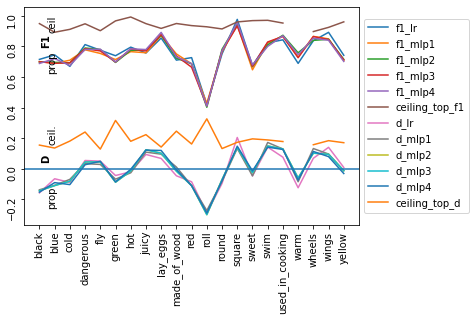

In [26]:
import utils_comparison
import matplotlib.pyplot as plt
import numpy as np

pl_extension = False
syn_control = False
model_name = 'wiki_corpus'
model_dist = 'giga_corpus-google-wiki_corpus'       
        
data_full = utils_comparison.load_data(model_dist, model_name, pl_extension, syn_control)  
data = [d for d in data_full if not d['property'].startswith('ceiling-') and d['property'] != 'female']
data_ceiling = [d for d in data_full if d['property'].startswith('ceiling-') and d['property'] != 'female']

df = pd.DataFrame(data).sort_values('property')#.fillna(0)
df_ceiling = pd.DataFrame(data_ceiling).sort_values('property')#.fillna(0)

df = df.sort_values('property')
df_ceiling = df_ceiling.sort_values('property')


top_f1_ceiling = list(df_ceiling["top_clfs_f1"])
top_s_ceiling = list(df_ceiling["top_select_f1"])

# get indices with missing props:
props = [prop for i, prop in df['property'].items()]
props_ceiling = [prop.split('-')[1] for i, prop in df_ceiling['property'].items()]

top_f1_ceiling_clean = []
prop_cnt = 0
for p in props:
    if p in props_ceiling:
        v = top_f1_ceiling[prop_cnt]
        prop_cnt += 1
    else:
        v = np.nan
    top_f1_ceiling_clean.append(v)

    
top_s_ceiling_clean = []
prop_cnt = 0
for p in props:
    if p in props_ceiling:
        v = top_s_ceiling[prop_cnt]
        prop_cnt += 1
    else:
        v = np.nan
    top_s_ceiling_clean.append(v)


lr_f1 = list(df["('lr', '0')"])

mlp1_f1 = list(df["('mlp', '50--300-mean')"])
mlp2_f1 = list(df["('mlp', '50-50-300-mean')"])
mlp3_f1 = list(df["('mlp', '100--300-mean')"])
mlp4_f1 = list(df["('mlp', '100-100-300-mean')"])
top_f1_ceiling = top_f1_ceiling_clean

#select-seed-mean-('lr', '0')
lr_s = list(df["select-seed-mean-('lr', '0')"])
mlp1_s = list(df["select-seed-mean-('mlp', '50--300-mean')"])
mlp2_s = list(df["select-seed-mean-('mlp', '50-50-300-mean')"])
mlp3_s = list(df["select-seed-mean-('mlp', '100--300-mean')"])
mlp4_s = list(df["select-seed-mean-('mlp', '100-100-300-mean')"])
top_s_ceiling = top_s_ceiling_clean


df = pd.DataFrame({'f1_lr': lr_f1,
                   'f1_mlp1': mlp1_f1,
                  'f1_mlp2': mlp2_f1, 
                   'f1_mlp3': mlp3_f1, 
                   'f1_mlp4': mlp4_f1,
                   'ceiling_top_f1': top_f1_ceiling,
                   'd_lr': lr_s, 
                   'd_mlp1': mlp1_s, 
                   'd_mlp2': mlp2_s, 
                   'd_mlp3': mlp2_s, 
                   'd_mlp4': mlp4_s, 'ceiling_top_d': top_s_ceiling}, index=props)
#ax = df.plot.line()

f = plt.figure()
df.plot(kind='line', ax=f.gca())
f.gca().xaxis.set_ticklabels(props)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.xticks(range(len(props)))
plt.axhline(0)
plt.text(0.5, 0.63,'prop', rotation=90)
plt.text(0.1, 0.8,'F1', rotation=90, weight='bold')
plt.text(0.5, 0.9,'ceil', rotation=90)
plt.text(0.5, 0.17,'ceil.', rotation=90)
plt.text(0.1, 0.05,'D', rotation=90, weight = 'bold')
plt.text(0.5, -0.25,'prop', rotation=90)
#f.gca().get_legend().remove()
plt.savefig(f'../analysis/{model_name.replace("_", "")}.png', bbox_inches='tight')
plt.show()

In [36]:
# intersections
import pandas as pd


pd.set_option('display.max_colwidth', None)
# parameters:
pl_extension = False
syn_control = False
model_names = ['giga_corpus', 'wiki_corpus', 'googlenews']
model_dist = 'giga_corpus-google-wiki_corpus'          
  
prop_data = []

props_learned_all = set()
props_not_learned_all = set()
props_all = set()

for n, model_name in enumerate(model_names):
    data = utils_comparison.load_data(model_dist, model_name, pl_extension, syn_control)  
    props_select, props_not_select, prop_data_dict = utils_comparison.get_learned_not_learned(
                                                         data)
    props_all.update(props_select)
    props_all.update(props_not_select)
    d = dict()
    d['model'] = model_name
    d['learned'] = ' '.join(sorted(props_select))
    d['not learned'] = ' '.join(sorted(props_not_select))
    prop_data.append(d)
    
    # get intersections
    if n == 0:
        props_learned_all.update(props_select)
        props_not_learned_all.update(props_not_select)
    else:
        props_learned_all = props_learned_all.intersection(props_select)
        props_not_learned_all = props_not_learned_all.intersection(props_not_select)
print(props_learned_all)   
print()
print(props_not_learned_all)
print(len(props_learned_all) + len(props_not_learned_all))

for d in prop_data:
    d['learned'] = d['learned'].replace('female', '')
    d['not learned'] = d['not learned'].replace('female', '')
    d['not learned'] = d['not learned'].replace('_', '\_')
    d['learned'] = d['learned'].replace('_', '\_')
    for p in props_learned_all:
        p = p.replace('_', '\_')
        if p in d['learned']:
            d['learned'] = d['learned'].replace(p, "\textbf{"+p+"}")
        #else:
         #   d['learned'] = d['learned'].replace(p, p_updated)
        
    for p in props_not_learned_all:
        p = p.replace('_', '\_')
        if p in d['not learned']:
            d['not learned'] = d['not learned'].replace(p, "\textbf{"+p+"}")
    
            
        
df = pd.DataFrame(prop_data).set_index('model').T
l = df.to_latex(index=False)
print(l.replace('\\textbackslash ', '\\').replace('\\{', '{').replace('\\}', '}'))
df.to_csv(f'../analysis/selectivity-{"_".join(model_names)}.csv')

#df

{'used_in_cooking', 'female', 'juicy', 'wheels', 'lay_eggs', 'wings', 'fly', 'square'}

{'black', 'green', 'cold', 'blue', 'round', 'warm', 'hot', 'roll', 'red'}
17
\begin{tabular}{lll}
\toprule
                                                                                                                                                    giga\_corpus &                                                                                                                                                     wiki\_corpus &                                                                                                                                                           googlenews \\
\midrule
                            \textbf{fly} \textbf{juicy} \textbf{lay\\_eggs} \textbf{square} sweet swim \textbf{used\\_in\\_cooking} \textbf{wheels} \textbf{wings} &  dangerous  \textbf{fly} \textbf{juicy} \textbf{lay\\_eggs} made\\_of\\_wood \textbf{square} swim \textbf{used\\_in\\_cooking} \textbf{wh

## 3. Analysis of challenging examples

Download distributional models for this.  

The to inspect the results reported in the paper, please go to ../analysis/errors/

In [1]:
#import utils_errors
import utils_neighbors
import utils_comparison
import pandas as pd
import os
from gensim.models import KeyedVectors
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [56]:
%ls ../../../../Data/dsm/corpus_exploration/wiki_full/trained_for_analysis_June2021/sgns_pinit1


pinit1                           sgns_rand_pinit1.contexts.vocab
setup.txt                        sgns_rand_pinit1.words
sgns_rand_pinit1.contexts        sgns_rand_pinit1.words.npy
sgns_rand_pinit1.contexts.npy    sgns_rand_pinit1.words.vocab


In [6]:
# wiki model
model_path = '../../../../Data/dsm/corpus_exploration/wiki_full/trained_for_analysis_June2021/sgns_pinit1/sgns_rand_pinit1.words'
#'wikipedia_full/sgns_pinit1/sgns_pinit1/sgns_rand_pinit1.words'
model = KeyedVectors.load_word2vec_format(model_path, binary=False)
model_dict_wiki = dict()
model_dict_wiki['model'] = model
model_dict_wiki['name'] = 'wiki_corpus'


In [41]:
# #elif model_name == 'googlenews':
# model_path = '../../../../Data/dsm/word2vec/GoogleNews-vectors-negative300.bin'
# model = KeyedVectors.load_word2vec_format(model_path, binary=True)
# model_dict_google = dict()
# model_dict_google['model'] = model
# model_dict_google['name'] = 'googlenews'

In [27]:
# giga
model_path = '../../../../Data/dsm/corpus_exploration/giga_full/sgns_pinit1/sgns_rand_pinit1.words'
model = KeyedVectors.load_word2vec_format(model_path, binary=False)
model_dict_giga = dict()
model_dict_giga['model'] = model
model_dict_giga['name'] = 'giga_corpus'


In [36]:
#wiki
split_name = 'standard-cosine'
model_dist = 'giga_corpus-google-wiki_corpus' 
props = utils_neighbors.get_props()

props = [f'female-{prop}' for prop in props]
model_dict = model_dict_giga
model_name = model_dict['name']
prop_overview, prop_outcome = utils_neighbors.get_prop_overview(split_name, 
                                                model_dist, model_dict, props)

# table_outcome = []
# for k, example_list in prop_outcome.items():
#     for d in example_list:
#         table_outcome.append(d)

#df_outcome = pd.DataFrame(table_outcome)
#df_outcome.to_csv(f'../analysis/errors/{model_dict["name"]}-outcome.csv')
for d in prop_overview:
    d['property'] = d['property'].split('-')[-1]
#prop_overview = [d.update([('property', d['property'].split('-')[0])]) for d in prop_overview]
df = pd.DataFrame(prop_overview).sort_values(('diff', 'correct-norm'), ascending=False).round(2)
os.makedirs('../analysis/errors', exist_ok=True)
df.to_csv(f'../analysis/errors/{model_dict["name"]}.csv')
#df 

# df = pd.read_csv(f'../analysis/errors/{model_name}.csv')
#print(df.to_latex(index=False))
df

,property,"(diff, total)","(diff, correct-abs)","(diff, correct-norm)","(same, total)","(same, correct-abs)","(same, correct-norm)"
12,made_of_wood,7,7,1.00,30,29,0.97
6,swim,8,8,1.00,37,37,1.00
18,red,16,15,0.94,45,45,1.00
10,hot,13,12,0.92,42,42,1.00
3,wings,13,12,0.92,33,32,0.97
16,green,24,22,0.92,34,34,1.00
17,cold,11,10,0.91,22,22,1.00
0,used_in_cooking,10,9,0.90,52,51,0.98
5,wheels,8,7,0.88,30,30,1.00
14,juicy,13,11,0.85,45,45,1.00


In [30]:
model_name = 'giga_corpus'
path = f'../analysis/errors/{model_name}/X.csv'
path_dir = f'../analysis/errors/{model_name}'
os.makedirs(path_dir, exist_ok=True)
props = list(df['property'])
for prop in props:
    path_prop = path.replace('X', prop)
    df_prop = pd.DataFrame(prop_outcome[prop]).sort_values('equivalent').round(2)
    df_prop.to_csv(path_prop)
    #df_prop = pd.read_csv(path_prop).round(2)
    
props = [ 'fly', 'dangerous', 'lay_eggs', 'made_of_wood', 'swim', 'wheels']
prop_data = []
for prop in props:
    data = prop_outcome[prop]
    d_diff_corr = [d for d in data if d['equivalent'] == False and d['outcome'] == 'correct']
    d_diff_incorr = [d for d in data if d['equivalent'] == False and d['outcome'] == 'incorrect']

    corr_pos = [f"{d['word_train']}*-{d['word_test']}" for d in d_diff_corr if d['label_train'] == 'pos']
    corr_neg = [f"{d['word_train']}-{d['word_test']}*" for d in d_diff_corr if d['label_train'] == 'neg']
    corr = corr_neg + corr_pos

    incorr_pos = [f"{d['word_train']}*-{d['word_test']}" for d in d_diff_incorr if d['label_train'] == 'pos']
    incorr_neg = [f"{d['word_train']}-{d['word_test']}*" for d in d_diff_incorr if d['label_train'] == 'neg']
    incorr = incorr_neg + incorr_pos

    d = dict()
    d['property'] = prop
    d['correct'] = ' '.join(corr)
    d['incorrect'] = ' '.join(incorr)
    prop_data.append(d)
    
df = pd.DataFrame(prop_data)
df

,property,correct,incorrect
0,fly,penguin-puffin* loon*-chow budgie*-rudd pelican*-barnacle,tractor-machine* rabbit-toy* interceptor-arrow* zebra-marabou* penguin-nightingale* deer-pheasant* deer-quail*
1,dangerous,iodine-neurotoxin*,bar-club* rabbit-coyote* blunderbuss*-bill malaria*-cure thief*-businessman thief*-pusher knife*-hoe alligator*-turtle snake*-toad
2,lay_eggs,whale-leatherback* crane*-hack platypus*-howler crane*-hackney halibut*-mole crocodile*-giraffe,hobby-lark*
3,made_of_wood,wheelbarrow-chock* wheel-clock* knife-toothpick*,saxophone-guitar* chimney-shaft* window*-date stool*-anchor pencil*-pen dowel*-screw roof*-windshield broom*-trowel
4,swim,chicken-cob* roach-loach* painter*-sweeper retriever*-cockatoo,chicken-goat* chicken-duck* mammal*-bonobo deer*-llama mammal*-colobus frog*-owl
5,wheels,passenger-luggage*,tugboat-rig* passenger-airplane* machine*-hack car*-windshield


In [31]:
print(df.to_latex(index=False))

\begin{tabular}{lll}
\toprule
     property &                                                                                          correct &                                                                                                                           incorrect \\
\midrule
          fly &                                        penguin-puffin* loon*-chow budgie*-rudd pelican*-barnacle &                      tractor-machine* rabbit-toy* interceptor-arrow* zebra-marabou* penguin-nightingale* deer-pheasant* deer-quail* \\
    dangerous &                                                                               iodine-neurotoxin* &  bar-club* rabbit-coyote* blunderbuss*-bill malaria*-cure thief*-businessman thief*-pusher knife*-hoe alligator*-turtle snake*-toad \\
     lay\_eggs &  whale-leatherback* crane*-hack platypus*-howler crane*-hackney halibut*-mole crocodile*-giraffe &                                                                                                

# Add corpus vocab info to data (--move to scripts)

In [59]:
from gensim.models import KeyedVectors
import json
import os

In [22]:
path_giga = '/Users/piasommerauer/Data/DSM/corpus_exploration/giga_full/sgns_pinit1/sgns_rand_pinit1.words'
path_wiki = '/Users/piasommerauer/Data/DSM/corpus_exploration/wiki_full/trained_for_analysis_June2021/sgns_pinit1/sgns_rand_pinit1.words'



In [16]:
%ls /Users/piasommerauer/Data/DSM/corpus_exploration/wiki_full/trained_for_analysis_June2021/sgns_pinit1

pinit1                           sgns_rand_pinit1.contexts.vocab
setup.txt                        sgns_rand_pinit1.words
sgns_rand_pinit1.contexts        sgns_rand_pinit1.words.npy
sgns_rand_pinit1.contexts.npy    sgns_rand_pinit1.words.vocab


In [12]:
model_giga = KeyedVectors.load_word2vec_format(path_giga, binary=False)

In [23]:
model_wiki = KeyedVectors.load_word2vec_format(path_wiki, binary=False)

In [60]:
# load data

def add_vocab_info(prop, vocab, model_name):
    # load file
    with open(f'../data/aggregated_vocab/{prop}.json', 'r') as infile:
         prop_dict = json.load(infile, strict=False)

#     # check vocab
    for c, d in prop_dict.items():
        if c in vocab and model_name not in d['model_vocabs']:
            d['model_vocabs'].append(model_name)

            
    # to file
    with open(f'../data/aggregated_vocab/{prop}.json', 'w') as outfile:
        prop_dict = json.dump(prop_dict, outfile)

In [62]:
props = [f.split('.')[0] for f in os.listdir('../data/aggregated_vocab/') if f.endswith('.json')]

vocab = model_giga.vocab
for prop in props:
    model_name = 'giga_corpus'
    vocab = model_giga.vocab
    add_vocab_info(prop, vocab, model_name)

In [63]:
vocab = model_wiki.vocab
for prop in props:
    model_name = 'wiki_corpus'
    vocab = model_giga.vocab
    add_vocab_info(prop, vocab, model_name)